In [121]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import csv,datetime,warnings,os

import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,Embedding

from sklearn import linear_model,datasets
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler,Binarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from tensorflow.examples.tutorials.mnist import input_data

warnings.filterwarnings('ignore')

In [124]:
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

tr_data = mnist.train.images
tr_labels = mnist.train.labels

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [125]:
print(tr_data.shape)
print(tr_labels.shape)

(55000, 784)
(55000, 10)


In [129]:
x_tr,y_tr,x_te,y_te = train_test_split(tr_data,tr_labels,test_size=0.1)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -27.63, time = 0.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -27.03, time = 0.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.98, time = 0.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.09, time = 0.12s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -23.97, time = 0.08s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -23.77, time = 0.07s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -23.52, time = 0.11s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -22.80, time = 0.10s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -22.38, time = 0.12s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -22.40, time = 0.28s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -22.75, time = 0.11s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -22.31, time = 0.11s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -21.91, time = 0.13s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -22.29, time = 0.09s
[BernoulliRBM] Iteration 15, 

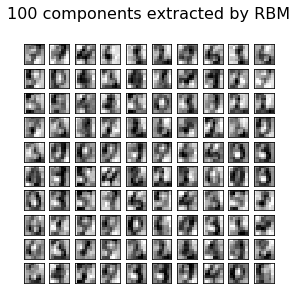

In [109]:
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
Y = digits.target
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

rbm.learning_rate = 0.06
rbm.n_iter = 20

rbm.n_components = 100
logistic.C = 6000.0

classifier.fit(X_train, Y_train)

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

In [104]:
f_mnist = keras.datasets.fashion_mnist
(train_data,train_labels),(test_data,test_labels) = f_mnist.load_data()

num_samples = train_data.shape[0]
x_dim = train_data.shape[1]
y_dim = train_data.shape[2]

t_data = np.reshape(train_data,[num_samples,x_dim*y_dim])

In [110]:
rbm = BernoulliRBM(batch_size=10,learning_rate=0.01,n_components=100,n_iter=30,random_state=0,verbose=1)

#logistic = linear_model.LogisticRegression()
#clf = Pipeline(steps=[('rbm',rbm),('logistic',logistic)])

#scaler = MinMaxScaler(feature_range=(0,1))
#t_data = scaler.fit_transform(t_data)
#t_data = t_data>0.5

binarizer = Binarizer(threshold=0.01,copy=True)
t_data_bin = binarizer.fit_transform(t_data)

rbm.fit_transform(t_data_bin)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -180.77, time = 14.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -169.57, time = 16.40s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -162.86, time = 16.25s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -156.21, time = 16.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -156.22, time = 16.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -159.08, time = 20.62s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -149.91, time = 17.09s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -151.10, time = 16.26s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -147.44, time = 15.29s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -149.62, time = 15.34s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -145.21, time = 15.18s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -144.76, time = 15.29s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -145.80, time = 16.56s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -144.46, time = 15.60s
[

array([[  4.73192016e-07,   1.00000000e+00,   2.21871765e-28, ...,
          5.12372114e-04,   1.00000000e+00,   6.88926220e-48],
       [  1.00000000e+00,   1.63916562e-23,   3.98028995e-47, ...,
          4.44144615e-13,   9.99999999e-01,   4.27632706e-59],
       [  1.00000000e+00,   4.82807372e-08,   7.29128555e-36, ...,
          4.35407122e-04,   1.00000000e+00,   4.09377597e-11],
       ..., 
       [  1.00000000e+00,   2.47553404e-17,   4.39245014e-34, ...,
          1.53138838e-11,   9.99999930e-01,   1.41461202e-23],
       [  1.00000000e+00,   2.67660399e-34,   1.45861193e-46, ...,
          2.33240593e-14,   1.00000000e+00,   8.45930752e-59],
       [  5.84946367e-03,   1.00000000e+00,   9.99999913e-01, ...,
          2.54019906e-05,   9.99998662e-01,   8.71625398e-23]])

In [117]:
#print(rbm.components_)
print(rbm.gibbs(v=rnd.rand(1,28*28)))

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False  True  True  True  True  True
   True  True  True  True False  True  True  True  True  True  True False
   True False  True False  True False  True False False False  True  True
  False  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True False False
  False False  True False  True  True  True  True  True False  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True False False False False  True  True False  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True False False  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True 

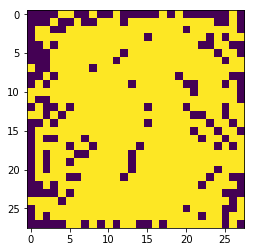

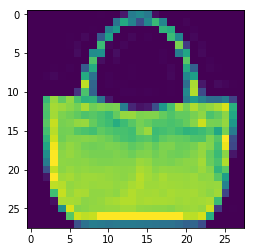

In [120]:
ID = 100

out = rbm.gibbs(rnd.rand(1,28*28)).astype(np.float32)

plt.imshow(np.reshape(out,[28,28]))
plt.show()

plt.imshow(np.reshape(t_data[ID,:],[28,28]))
plt.show()